# <font color ='blue'>Zillow Regression Project - Working Copy
    
<img src="zillow_logo.png" alt="Zillow Logo" title="Zillow Logo" width="600" height="100" align="right"/>  

    
<br>  

    
# <p style="font-size:50px" align="center">House Value Modeling</p><p>By Kaniela Denis - 13 Dec 2021</p>  
    
    
<hr style="border:2px Solid Blue"/>

In [7]:
# import pandas and numpy to start coding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# prep methods
from sklearn.model_selection import train_test_split

# Feature Engineering methods
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing

# Modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings("ignore")

<hr style="border:2px Solid Blue"/>



<hr style="border:2px Solid Blue"/>

***

+ One
+ Two
+ Three
    - Nested One
    - Nest Two


- One
- Two
    - One
    - Two

<hr style="border:2px solid blue"/>
> this is a block quote
>> this is a nextd block quote


> #### The quarterly results look great!

> - Revenue was off the chart.

> - Profits were higher than ever.

>  *Everything* is going according to **plan**.

<hr style="border:2px solid blue"/>


# <font color = 'red'>Planning

### Project Goals

- A model that predicts property tax assessed values of single family properties based on 2017 transactions.
- Identify ways to make a better model for Zillow.
- Create new features out of existing features.
- Try non-linear regression model or try a model for each county.


- Provide Project Resources: [GitHub link](https://github.com/kanieladenis/zillow_regression_project "MyGitHub").

- There's Hope Pic:![alt text](http://path/to/img.jpg "Title")

### Project Description

Deliver:
1. Github Repo
    - README.md
    - Final Report
    - Working Notebooks
    - Acquire and Prepare Modules
    - Misc Artifacts
1. Regression Model (Linear or Non-Linear)
2. Final Notebook with Recommendation
    - 4 Visuals, 2 with stats tests
        - Data Context of Target Variable (Distribution of values)
    - 3 Best Models (show steps/code to fit/eval/select)
    - Visual of how best Model performed
3. Working Notebook:
    - Reproducible comments
    - Exploration with at least two stats test during exploration
5. Presentation
    - Findings
    - Methodologies
    - Conclusions

### Initial Questions

- What are the transactions are in 2017?
- What states and counties are the properties located in?
- What is the tax rate per county or fips? (might have to combine columns to calcualate)
- What is the distribution of tax rates for each county?
- What is the distribution of taxes across fips?
- What are the drivers of single family property values?
- Why do some properties have a much higher value than others when they are located so close to each other?
- Why are some properties valued so differently from others when they have nearly the same physical attributes but only differ in location? 
- Is having 1 bathroom worse than having 2 bedrooms?

### Data Dictionary (Add to README)

In [2]:
# Read Data Dictionary from working directory
dd = pd.read_excel('zillow_data_dictionary.xlsx')
dd

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


In [4]:
## References are available on my GitHub 

In [5]:
[click me](https://github.com/kanieladenis/zillow_regression_project)

SyntaxError: invalid syntax (<ipython-input-5-823771bc6afb>, line 1)

# <font color = 'red'> Acquisition (Get and Clean Data)

## <font color = 'red'>Get Data

- Added env.py to the repo .gitignore file so env.py won't be pushed to github
- Created an env file that contains my username, password, and host address fo the MySQL Server.

In [3]:
# import env file for hostname, username, password, and db_name
from env import host, user, password, db_name

In [4]:
# Pass env file authentication to container 'url'
url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

### Pull records of houses with transactions from 2017

In [5]:
# define sql search for all records from all tables
sql ='''
SELECT prop17.parcelid, prop17.calculatedfinishedsquarefeet,
prop17.yearbuilt, prop17.bedroomcnt, prop17.bathroomcnt, prop17.taxvaluedollarcnt, prop17.taxamount,
prop17.fips, prop17.regionidzip, prop17.regionidneighborhood, prop17.poolcnt,
prop17.lotsizesquarefeet, prop17.garagecarcnt, prop17.latitude, prop17.longitude, 
pred17.transactiondate
FROM properties_2017 prop17
JOIN predictions_2017 pred17  USING (parcelid)
LEFT JOIN propertylandusetype using (propertylandusetypeid)
WHERE propertylandusetypeid='261'
'''

#### Note: Removed LIKE '2017%' since it resulted in error  for unknown support  for (''')

### Take Aways:
- Identified the following list but limited IAW project guidelines:
    - pred17.id, pred17.parcelid, pred17.transactiondate, prop17.calculatedfinishedsquarefeet, 
prop17.yearbuilt, prop17.bedroomcnt, prop17.bathroomcnt, prop17.taxvaluedollarcnt, prop17.taxamount, 
prop17.fips, prop17.regionidzip, prop17.lotsizesquarefeet, prop17.poolcnt, prop17.fireplacecnt
- Sencond run: added the above columns

In [6]:
# load zillow data from saved csv or pull from sql server and save to csv
import os
file = 'zillow_data.csv'
if os.path.isfile(file):
    df = pd.read_csv(file, index_col=0)
else:
    df = pd.read_sql(sql,url)
    df.to_csv(file)
df.head()

,parcelid,calculatedfinishedsquarefeet,yearbuilt,bedroomcnt,bathroomcnt,taxvaluedollarcnt,taxamount,fips,regionidzip,regionidneighborhood,poolcnt,lotsizesquarefeet,garagecarcnt,latitude,longitude,transactiondate
0,14297519,3100.0,1998.0,4.0,3.5,1023282.0,11013.72,6059.0,96978.0,NaN,NaN,4506.0,2.0,33634931.0,-117869207.0,2017-01-01
1,17052889,1465.0,1967.0,2.0,1.0,464000.0,5672.48,6111.0,97099.0,NaN,NaN,12647.0,1.0,34449266.0,-119281531.0,2017-01-01
2,14186244,1243.0,1962.0,3.0,2.0,564778.0,6488.30,6059.0,97078.0,NaN,1.0,8432.0,2.0,33886168.0,-117823170.0,2017-01-01
3,12177905,2376.0,1970.0,4.0,3.0,145143.0,1777.51,6037.0,96330.0,NaN,1.0,13038.0,NaN,34245180.0,-118240722.0,2017-01-01
4,12095076,2962.0,1950.0,4.0,3.0,773303.0,9516.26,6037.0,96293.0,274684.0,1.0,63000.0,NaN,34145202.0,-118179824.0,2017-01-01


### Show df info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52442 entries, 0 to 52441
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52442 non-null  int64  
 1   calculatedfinishedsquarefeet  52360 non-null  float64
 2   yearbuilt                     52326 non-null  float64
 3   bedroomcnt                    52442 non-null  float64
 4   bathroomcnt                   52442 non-null  float64
 5   taxvaluedollarcnt             52441 non-null  float64
 6   taxamount                     52438 non-null  float64
 7   fips                          52442 non-null  float64
 8   regionidzip                   52416 non-null  float64
 9   regionidneighborhood          19033 non-null  float64
 10  poolcnt                       11096 non-null  float64
 11  lotsizesquarefeet             52073 non-null  float64
 12  garagecarcnt                  18015 non-null  float64
 13  l

### Take Aways:
- 52.5K records

In [8]:
df.isnull().sum()

parcelid                            0
calculatedfinishedsquarefeet       82
yearbuilt                         116
bedroomcnt                          0
bathroomcnt                         0
taxvaluedollarcnt                   1
taxamount                           4
fips                                0
regionidzip                        26
regionidneighborhood            33409
poolcnt                         41346
lotsizesquarefeet                 369
garagecarcnt                    34427
latitude                            0
longitude                           0
transactiondate                     0
dtype: int64

### Take Aways:
- Too many nulls in neighborhood, pools, fireplace, garage
### What is the range of the transaction date? Found that 

In [9]:
df.transactiondate.min(), df.transactiondate.max()

('2017-01-01', '2018-05-25')

- Found that 2018 transactions exist
### What are the 2018 Transactions?

In [10]:
df[df.transactiondate.str.contains('2018')]

,parcelid,calculatedfinishedsquarefeet,yearbuilt,bedroomcnt,bathroomcnt,taxvaluedollarcnt,taxamount,fips,regionidzip,regionidneighborhood,poolcnt,lotsizesquarefeet,garagecarcnt,latitude,longitude,transactiondate
52441,13083743,1050.0,1960.0,3.0,2.0,259334.0,3345.78,6037.0,96488.0,NaN,NaN,5927.0,NaN,34010864.0,-117900894.0,2018-05-25


- Found one record
### Remove record from df

In [11]:
df = df.drop(index=52441)
df[df.transactiondate.str.contains('2018')]

,parcelid,calculatedfinishedsquarefeet,yearbuilt,bedroomcnt,bathroomcnt,taxvaluedollarcnt,taxamount,fips,regionidzip,regionidneighborhood,poolcnt,lotsizesquarefeet,garagecarcnt,latitude,longitude,transactiondate


- Confirmed 2018 record was remove

### Create Functions to Get Zillow Data

## <font color = 'red'> Clean Data

In [12]:
df.head()

,parcelid,calculatedfinishedsquarefeet,yearbuilt,bedroomcnt,bathroomcnt,taxvaluedollarcnt,taxamount,fips,regionidzip,regionidneighborhood,poolcnt,lotsizesquarefeet,garagecarcnt,latitude,longitude,transactiondate
0,14297519,3100.0,1998.0,4.0,3.5,1023282.0,11013.72,6059.0,96978.0,NaN,NaN,4506.0,2.0,33634931.0,-117869207.0,2017-01-01
1,17052889,1465.0,1967.0,2.0,1.0,464000.0,5672.48,6111.0,97099.0,NaN,NaN,12647.0,1.0,34449266.0,-119281531.0,2017-01-01
2,14186244,1243.0,1962.0,3.0,2.0,564778.0,6488.30,6059.0,97078.0,NaN,1.0,8432.0,2.0,33886168.0,-117823170.0,2017-01-01
3,12177905,2376.0,1970.0,4.0,3.0,145143.0,1777.51,6037.0,96330.0,NaN,1.0,13038.0,NaN,34245180.0,-118240722.0,2017-01-01
4,12095076,2962.0,1950.0,4.0,3.0,773303.0,9516.26,6037.0,96293.0,274684.0,1.0,63000.0,NaN,34145202.0,-118179824.0,2017-01-01


### Rename columns for Readability

In [13]:
df.columns.to_list()

['parcelid',
 'calculatedfinishedsquarefeet',
 'yearbuilt',
 'bedroomcnt',
 'bathroomcnt',
 'taxvaluedollarcnt',
 'taxamount',
 'fips',
 'regionidzip',
 'regionidneighborhood',
 'poolcnt',
 'lotsizesquarefeet',
 'garagecarcnt',
 'latitude',
 'longitude',
 'transactiondate']

In [14]:
# rename columns for readability
df = df.rename(columns = {'parcelid':'parcel_id',
                          'calculatedfinishedsquarefeet':'area',
                          'yearbuilt':'year_built',
                          'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms',
                          'taxvaluedollarcnt':'tax_value',
                          'taxamount':'tax_amount',
                          'transactiondate':'transaction_date',
                          'regionidzip':'zipcode',
                             'regionidneighborhood':'neighborhood',
                             'poolcnt':'pools',
                             'lotsizesquarefeet':'lot_size',
                          'garagecarcnt':'garages'
                         })

### Check Columns Names Changed

In [15]:
df.columns

Index(['parcel_id', 'area', 'year_built', 'bedrooms', 'bathrooms', 'tax_value',
       'tax_amount', 'fips', 'zipcode', 'neighborhood', 'pools', 'lot_size',
       'garages', 'latitude', 'longitude', 'transaction_date'],
      dtype='object')

### Dropping transaction_date, and parcel_id columns since it doens't help with explore or modeling

In [16]:
df = df.drop(columns=['transaction_date', 'parcel_id'])
df.columns

Index(['area', 'year_built', 'bedrooms', 'bathrooms', 'tax_value',
       'tax_amount', 'fips', 'zipcode', 'neighborhood', 'pools', 'lot_size',
       'garages', 'latitude', 'longitude'],
      dtype='object')

### Show describe without scientific notation

In [17]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,area,year_built,bedrooms,bathrooms,tax_value,tax_amount,fips,zipcode,neighborhood,pools,lot_size,garages,latitude,longitude
count,52359,52325,52441,52441,52440,52437,52441,52415,19033,11096,52072,18015,52441,52441
mean,1922.89,1963.39,3.30068,2.2994,529688,6453.51,6049.13,96635.8,180267,1,11339.6,1.94899,3.40225e+07,-1.18194e+08
std,1004.37,23.1336,0.949094,1.02277,751895,8755.57,21.0291,4605.11,159825,0,86747.6,0.549944,273979,356663
min,128,1878,0,0,1000,49.18,6037,95982,6952,1,236,0,3.33406e+07,-1.19475e+08
25%,1268,1950,3,2,193748,2656.22,6037,96206,41131,1,5583,2,3.38269e+07,-1.18401e+08
50%,1659,1961,3,2,373612,4647.74,6037,96412,118208,1,6840.5,2,3.40238e+07,-1.18153e+08
75%,2306,1979,4,3,619301,7377.5,6059,96995,274514,1,8798.25,2,3.41872e+07,-1.17929e+08
max,21929,2016,14,18,4.90612e+07,586639,6111,399675,764167,1,6.97101e+06,14,3.48188e+07,-1.17555e+08


### Take Away: 
- Huge Skew in tax value, area, lot_size
- Counts are off in multiple columns
- bedrooms and bathroom contain zero
### Change Blanks to Nulls

In [18]:
# replace banks with NaN 
df = df.replace('', np.nan)

### Check for Nulls

In [19]:
df.isnull().sum()

area               82
year_built        116
bedrooms            0
bathrooms           0
tax_value           1
tax_amount          4
fips                0
zipcode            26
neighborhood    33408
pools           41345
lot_size          369
garages         34426
latitude            0
longitude           0
dtype: int64

In [20]:
value_cols = df.drop(columns=['area','year_built','tax_value','lot_size'])
for col in value_cols:
    print(f'----------------{col}--------------------')
    print(df[col].value_counts())

----------------bedrooms--------------------
3.0     23359
4.0     15240
2.0      8340
5.0      3973
6.0       635
1.0       612
0.0       137
7.0       106
8.0        24
9.0         8
12.0        3
10.0        2
14.0        1
11.0        1
Name: bedrooms, dtype: int64
----------------bathrooms--------------------
2.0     21893
3.0     10673
1.0      9568
2.5      3934
4.0      2227
3.5       918
1.5       841
5.0       803
4.5       687
6.0       322
5.5       224
0.0       121
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
8.5         3
11.0        3
18.0        1
13.0        1
Name: bathrooms, dtype: int64
----------------tax_amount--------------------
345.72      4
30342.87    3
5505.30     3
855.16      3
4386.16     3
           ..
4831.53     1
30241.47    1
12685.87    1
7953.08     1
21590.39    1
Name: tax_amount, Length: 50834, dtype: int64
----------------fips--------------------
6037.0    33910
6059.0    14136
6111.0     4395
Name: fips

In [21]:
df.isna().sum()

area               82
year_built        116
bedrooms            0
bathrooms           0
tax_value           1
tax_amount          4
fips                0
zipcode            26
neighborhood    33408
pools           41345
lot_size          369
garages         34426
latitude            0
longitude           0
dtype: int64

In [22]:
df.shape

(52441, 14)

### Replaced Pool NaN with 0

In [23]:
# replace pool, lot_size, l nan with 0
df.pools = df.pools.replace(np.nan, 0)

In [24]:
df.pools.isna().sum()

0

In [25]:
df.shape

(52441, 14)

### Replace lot_size with median, 6,384

<AxesSubplot:>

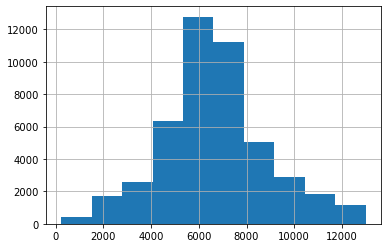

In [26]:
df[df.lot_size < 13000].lot_size.hist()

In [27]:
# replace lot_size, lot_size, l nan with meian
df.lot_size = df.lot_size.replace(np.nan, df.lot_size.mean())
df.lot_size.isna().sum()

0

In [28]:
df.shape

(52441, 14)

### Replace Zipcode NaN

In [29]:
df.zipcode.describe()

count     52415.000000
mean      96635.846380
std        4605.107533
min       95982.000000
25%       96206.000000
50%       96412.000000
75%       96995.000000
max      399675.000000
Name: zipcode, dtype: float64

<AxesSubplot:>

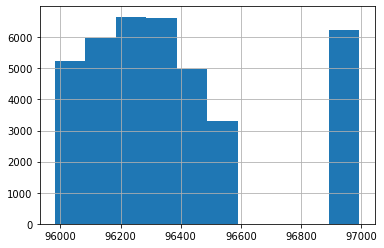

In [30]:
df[df.zipcode < 96995].zipcode.hist()

<AxesSubplot:>

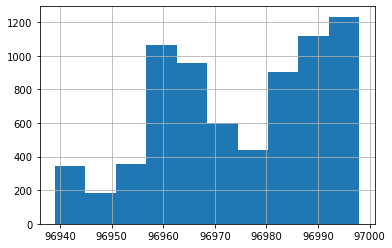

In [31]:
df[(df.zipcode > 96600) & (df.zipcode < 97000)].zipcode.hist()

<AxesSubplot:>

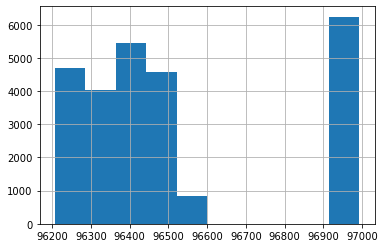

In [32]:
df[(df.zipcode > 96206) & (df.zipcode < 96995)].zipcode.hist()

### Drop records with zipcode NaN, not useful 

### Replace year_built

<AxesSubplot:>

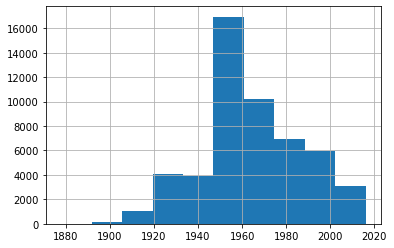

In [33]:
df.year_built.hist()

In [34]:
df.year_built.describe()

count    52325.000000
mean      1963.393884
std         23.133571
min       1878.000000
25%       1950.000000
50%       1961.000000
75%       1979.000000
max       2016.000000
Name: year_built, dtype: float64

In [35]:
df.year_built.value_counts()

1955.0    1899
1950.0    1608
1954.0    1520
1953.0    1485
1956.0    1387
          ... 
1897.0       1
1882.0       1
1894.0       1
1880.0       1
1889.0       1
Name: year_built, Length: 133, dtype: int64

In [36]:
#Set year_built to 1955, most used year
df.year_built = df.year_built.replace(np.nan, 1955)

In [37]:
df.isna().sum()

area               82
year_built          0
bedrooms            0
bathrooms           0
tax_value           1
tax_amount          4
fips                0
zipcode            26
neighborhood    33408
pools               0
lot_size            0
garages         34426
latitude            0
longitude           0
dtype: int64

### Replace area NaN with most used 

In [38]:
df.area.describe()

count    52359.000000
mean      1922.890754
std       1004.365838
min        128.000000
25%       1268.000000
50%       1659.000000
75%       2306.000000
max      21929.000000
Name: area, dtype: float64

<AxesSubplot:>

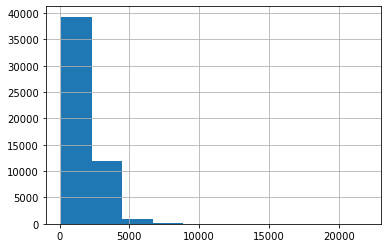

In [39]:
df.area.hist()

<AxesSubplot:>

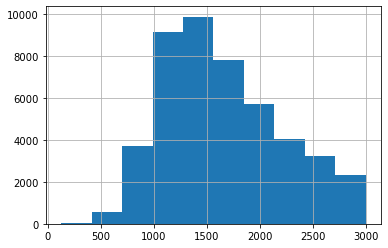

In [40]:
df[df.area < 3000].area.hist()

<AxesSubplot:>

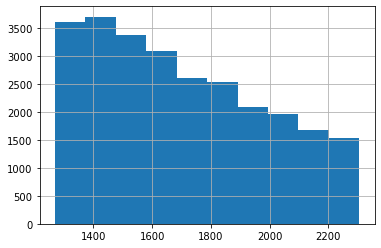

In [41]:
df[(df.area > 1268) & (df.area < 2306)].area.hist()

In [42]:
df.area.value_counts()

1120.0    128
1200.0    119
1080.0    102
1040.0     86
936.0      86
         ... 
524.0       1
5119.0      1
6649.0      1
3491.0      1
3943.0      1
Name: area, Length: 4723, dtype: int64

### Replace Area NaN with Most Used 1120

In [43]:
# replace area Nan with most used area (1120)
df.area = df.area.replace(np.nan, 1120)
df.isna().sum()

area                0
year_built          0
bedrooms            0
bathrooms           0
tax_value           1
tax_amount          4
fips                0
zipcode            26
neighborhood    33408
pools               0
lot_size            0
garages         34426
latitude            0
longitude           0
dtype: int64

### Drop columns garage and neighborhood, too many missing NaN and not usefult

In [44]:
# Drop garages and neighborhood, too many NaN in garage and neighborhoo
df = df.drop(columns=['garages','neighborhood'])
df.isna().sum()

area           0
year_built     0
bedrooms       0
bathrooms      0
tax_value      1
tax_amount     4
fips           0
zipcode       26
pools          0
lot_size       0
latitude       0
longitude      0
dtype: int64

### Drop Null from the rest beause recordes are few

In [45]:
# NaN left are few, dropping all NaNs
df = df.dropna()
df.shape

(52410, 12)

### Nulls are removed
### Check Data Typ and change data type from float to int

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52410 entries, 0 to 52440
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        52410 non-null  float64
 1   year_built  52410 non-null  float64
 2   bedrooms    52410 non-null  float64
 3   bathrooms   52410 non-null  float64
 4   tax_value   52410 non-null  float64
 5   tax_amount  52410 non-null  float64
 6   fips        52410 non-null  float64
 7   zipcode     52410 non-null  float64
 8   pools       52410 non-null  float64
 9   lot_size    52410 non-null  float64
 10  latitude    52410 non-null  float64
 11  longitude   52410 non-null  float64
dtypes: float64(12)
memory usage: 5.2 MB


In [47]:
df.head()

,area,year_built,bedrooms,bathrooms,tax_value,tax_amount,fips,zipcode,pools,lot_size,latitude,longitude
0,3100.0,1998.0,4.0,3.5,1023282.0,11013.72,6059.0,96978.0,0.0,4506.0,33634931.0,-117869207.0
1,1465.0,1967.0,2.0,1.0,464000.0,5672.48,6111.0,97099.0,0.0,12647.0,34449266.0,-119281531.0
2,1243.0,1962.0,3.0,2.0,564778.0,6488.30,6059.0,97078.0,1.0,8432.0,33886168.0,-117823170.0
3,2376.0,1970.0,4.0,3.0,145143.0,1777.51,6037.0,96330.0,1.0,13038.0,34245180.0,-118240722.0
4,2962.0,1950.0,4.0,3.0,773303.0,9516.26,6037.0,96293.0,1.0,63000.0,34145202.0,-118179824.0


In [48]:
# convert all columnst to integer for readability
df = df.astype('int')

### Confirm Data Type Changed to Integer for readabilityh

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52410 entries, 0 to 52440
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   area        52410 non-null  int64
 1   year_built  52410 non-null  int64
 2   bedrooms    52410 non-null  int64
 3   bathrooms   52410 non-null  int64
 4   tax_value   52410 non-null  int64
 5   tax_amount  52410 non-null  int64
 6   fips        52410 non-null  int64
 7   zipcode     52410 non-null  int64
 8   pools       52410 non-null  int64
 9   lot_size    52410 non-null  int64
 10  latitude    52410 non-null  int64
 11  longitude   52410 non-null  int64
dtypes: int64(12)
memory usage: 5.2 MB


In [50]:
df.head()

,area,year_built,bedrooms,bathrooms,tax_value,tax_amount,fips,zipcode,pools,lot_size,latitude,longitude
0,3100,1998,4,3,1023282,11013,6059,96978,0,4506,33634931,-117869207
1,1465,1967,2,1,464000,5672,6111,97099,0,12647,34449266,-119281531
2,1243,1962,3,2,564778,6488,6059,97078,1,8432,33886168,-117823170
3,2376,1970,4,3,145143,1777,6037,96330,1,13038,34245180,-118240722
4,2962,1950,4,3,773303,9516,6037,96293,1,63000,34145202,-118179824


### Data Type changed to integer
## Visualizing Distributions and Outliers

### Plot Histograms

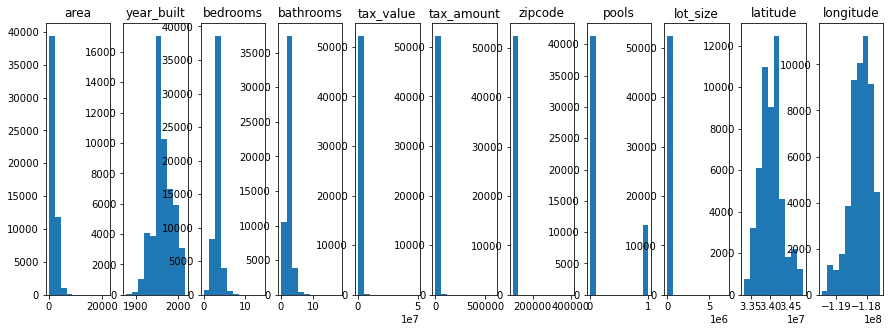

In [51]:
plt.figure(figsize=(15, 5))

# List of columns
cols = [col for col in df.columns.drop(['fips']).to_list()]

for i, col in enumerate(cols,1):

    # i starts at 0, but plot nos should start at 1
    plot_number = i

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist()

    # Hide gridlines.
    plt.grid()
    
    # turn off scientific notation
    #plt.ticklabel_format(useOffset=False)
    
plt.show()

### Take Aways
- x axis range is showing with no values meaning they are skewed
- tax_value has sever skew since its x-axis got to 1e7 
- area has skew

### Plot Box Plots

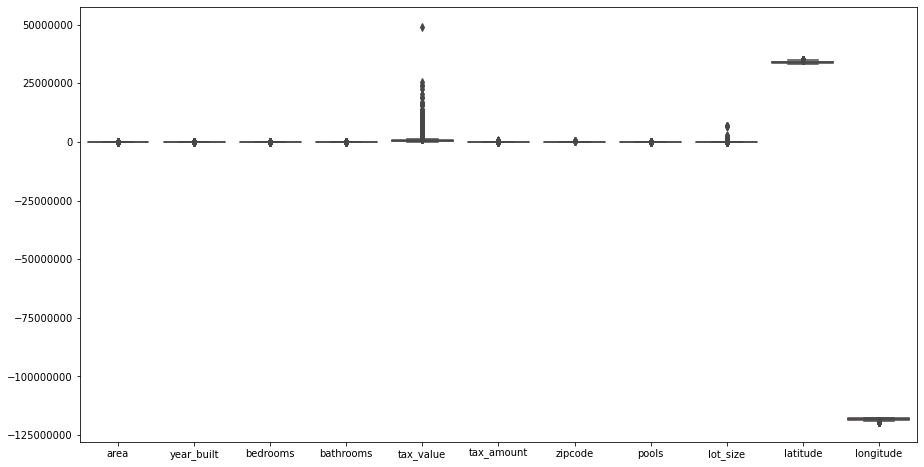

In [52]:
# plot box plots for columns except fips
plt.figure(figsize=(15,8))
plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=df.drop(columns=['fips']))
plt.show()

### Take Aways
- tax_value has a severe skew making the other columsn unreadable

### Visualize Columns with Larger Box Plots

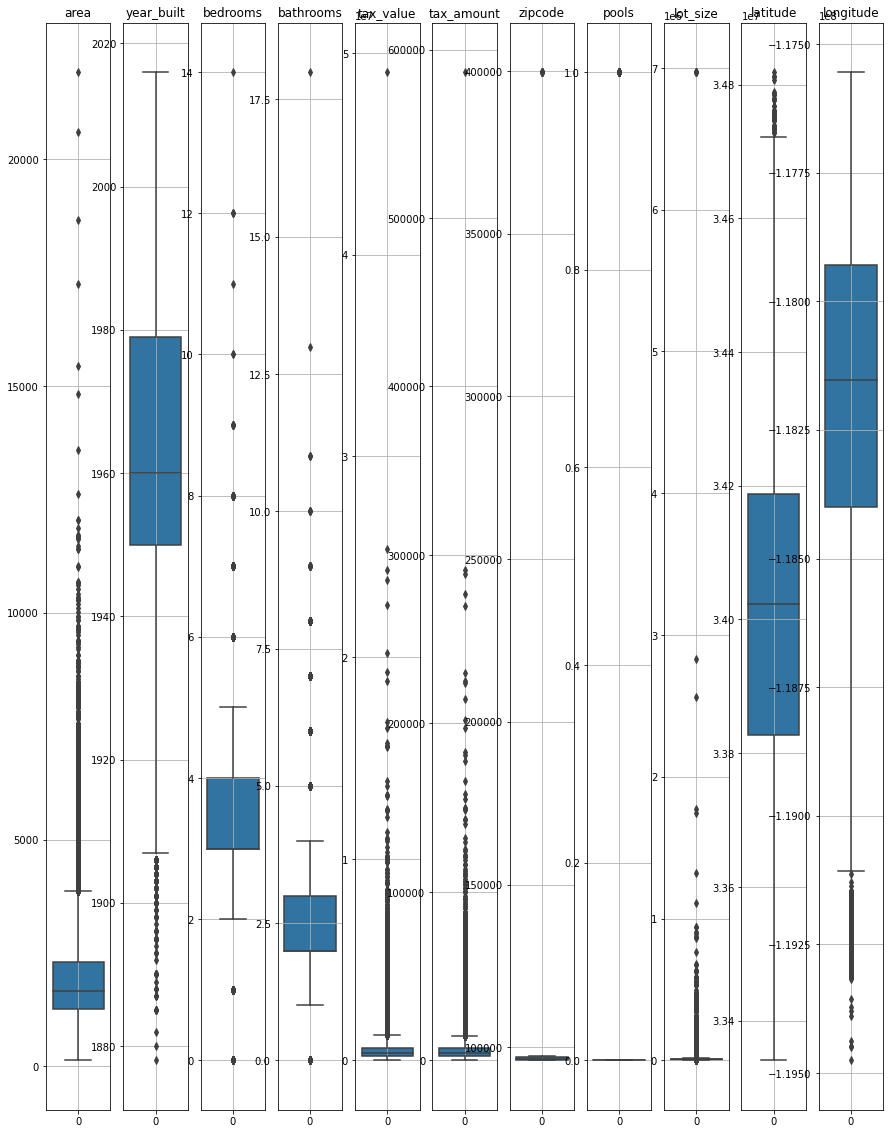

In [53]:
plt.figure(figsize=(15, 20))

# List of columns
cols = [col for col in df.columns.drop(['fips']).to_list()]

for i, col in enumerate(cols,1):

    # i starts at 0, but plot nos should start at 1
    plot_number = i

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    sns.boxplot(data=df[col])

    # Hide gridlines.
    plt.grid()
    
    # turn off scientific notation
    #plt.ticklabel_format(useOffset=False)
    
plt.show()

### Take Aways
- Lager Plot Boxesshow many outliers with a huge skew for tax_value

# <font color = 'red'>Prep Data (Tidy, Wrangle, Split)

## Tidy Data
### Remove Outliers

### Create List of columns to remove outliers from

In [54]:
# prep for outlier removal: not including categories fips, pools, zipcode
cols_list = df.drop(columns=['fips','zipcode', 'pools'])
cols_list.head()

,area,year_built,bedrooms,bathrooms,tax_value,tax_amount,lot_size,latitude,longitude
0,3100,1998,4,3,1023282,11013,4506,33634931,-117869207
1,1465,1967,2,1,464000,5672,12647,34449266,-119281531
2,1243,1962,3,2,564778,6488,8432,33886168,-117823170
3,2376,1970,4,3,145143,1777,13038,34245180,-118240722
4,2962,1950,4,3,773303,9516,63000,34145202,-118179824


### Check Shape and Row Count

In [55]:
df.shape

(52410, 12)

### Find quartile points for upper / lower bounds and remove outliers

In [56]:
 for col in cols_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + 2 * iqr   # get upper bound
        lower_bound = q1 - 2 * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]


### Check shape and confirmed lost around 5K records

In [57]:
df.shape

(43299, 12)

### Display Box Plots to visualize new ranges

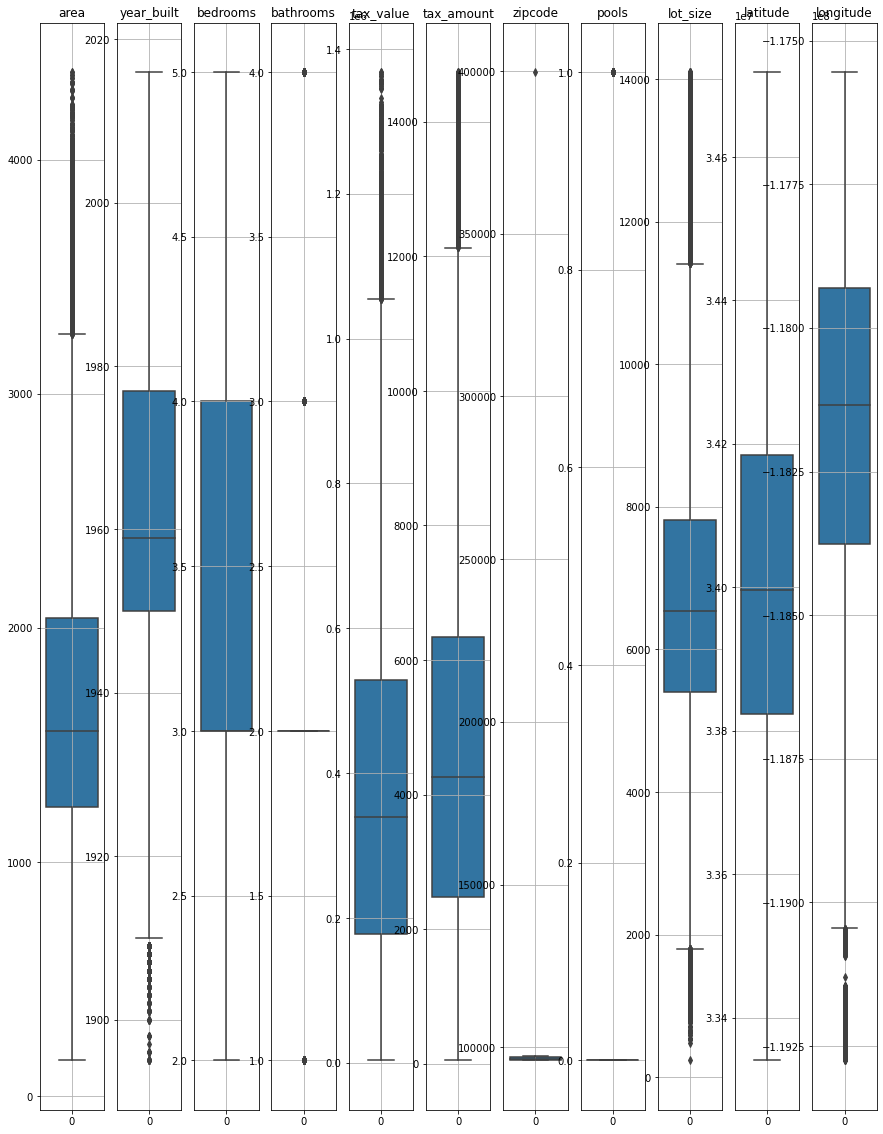

In [58]:
plt.figure(figsize=(15, 20))

# List of columns
cols = [col for col in df.columns.drop(['fips']).to_list()]

for i, col in enumerate(cols,1):

    # i starts at 0, but plot nos should start at 1
    plot_number = i

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    sns.boxplot(data=df[col])

    # Hide gridlines.
    plt.grid()
    
    # turn off scientific notation
    #plt.ticklabel_format(useOffset=False)
    
plt.show()

### Take Away:
- Box Plot outliers are more visual and boxes are clear
### Display historgrams to visualize distributions

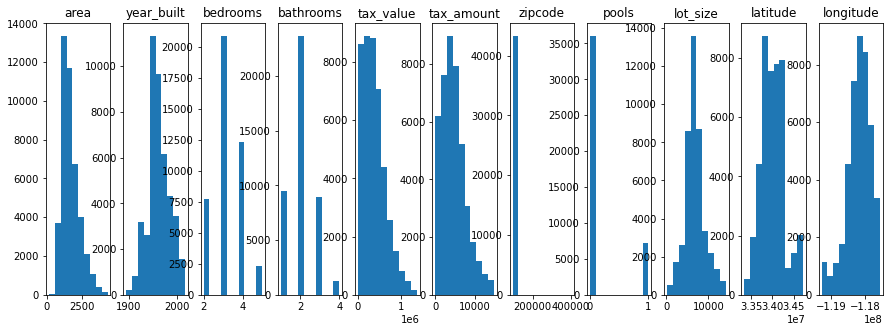

In [59]:
plt.figure(figsize=(15, 5))

# List of columns
cols = [col for col in df.columns.drop(['fips']).to_list()]

for i, col in enumerate(cols,1):

    # i starts at 0, but plot nos should start at 1
    plot_number = i

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist()

    # Hide gridlines.
    plt.grid()
    
    # turn off scientific notation
    #plt.ticklabel_format(useOffset=False)
    
plt.show()

### Take Away:
- Distribution looks good, no more large blanks along the x-axis
- Tax_value x-axis has skew but I lowering the limit bounds doens't change
- Long/Lat has skew but I don't want to change the values
- End with 47.5K records

## Univariate Analysis

### Closer look at columns with histograph

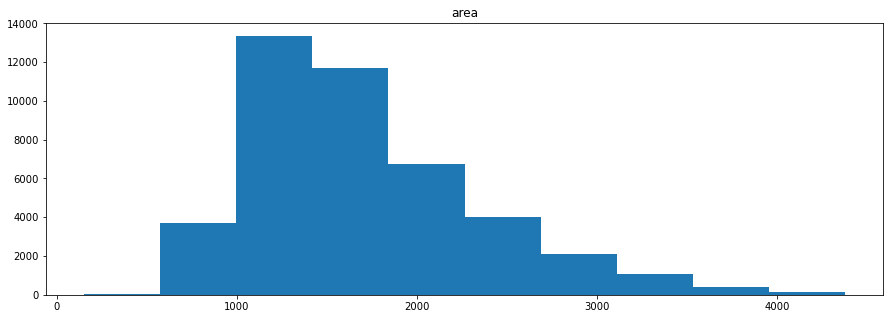

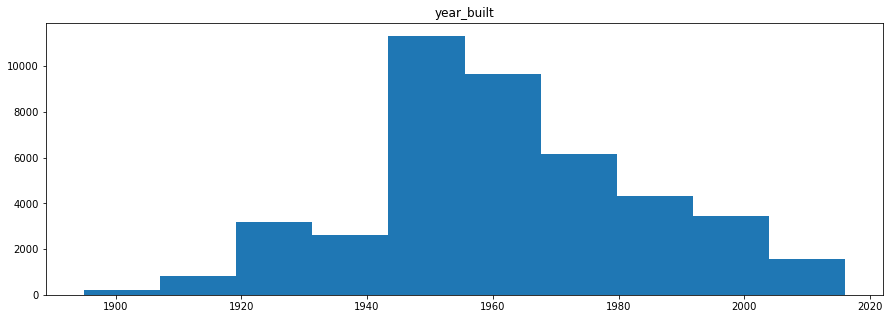

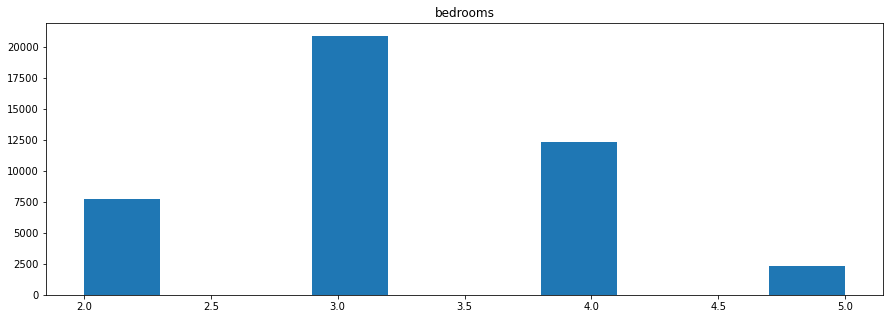

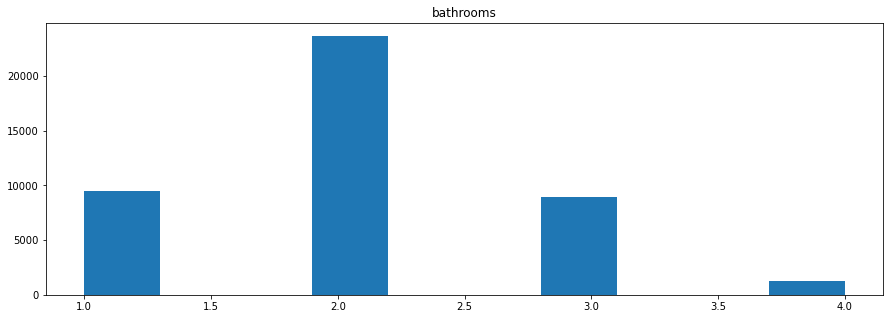

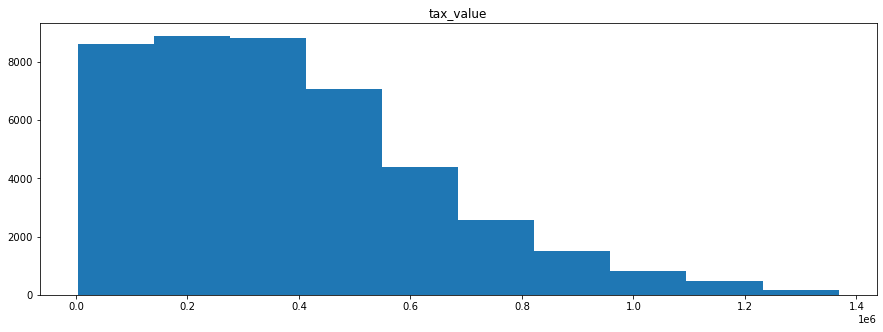

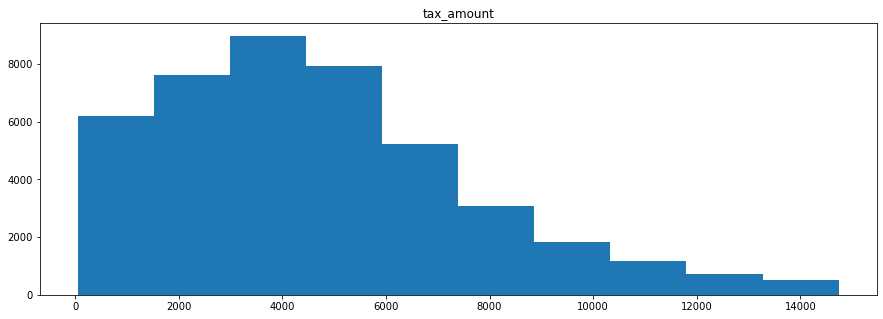

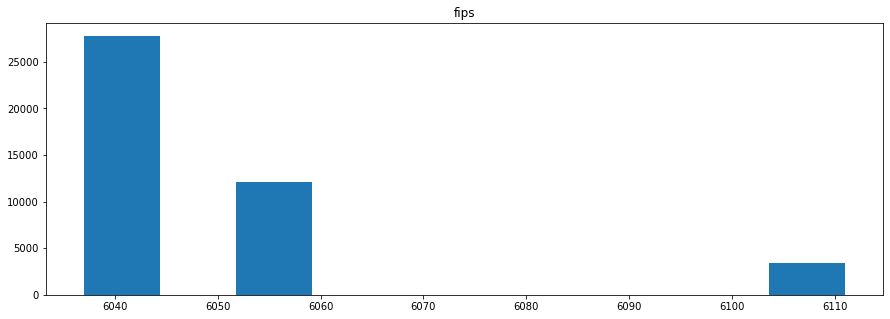

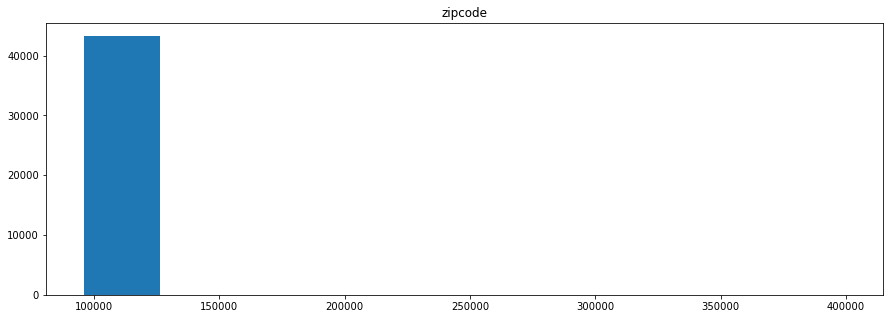

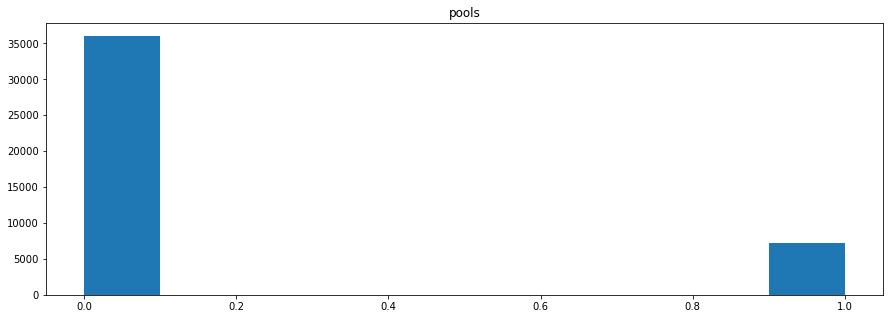

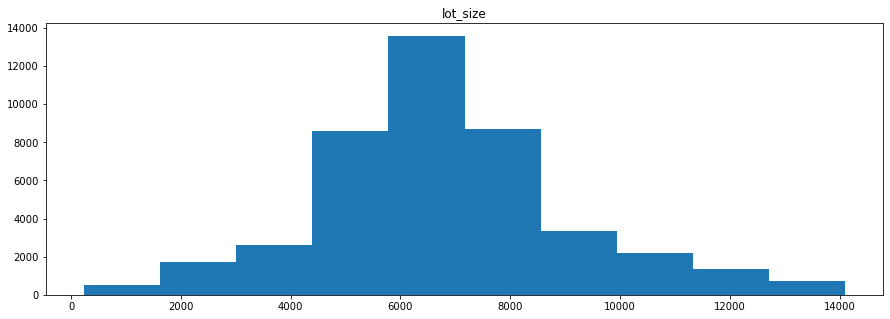

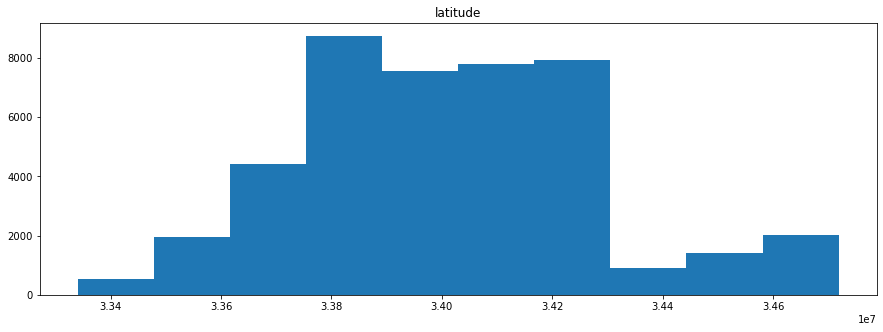

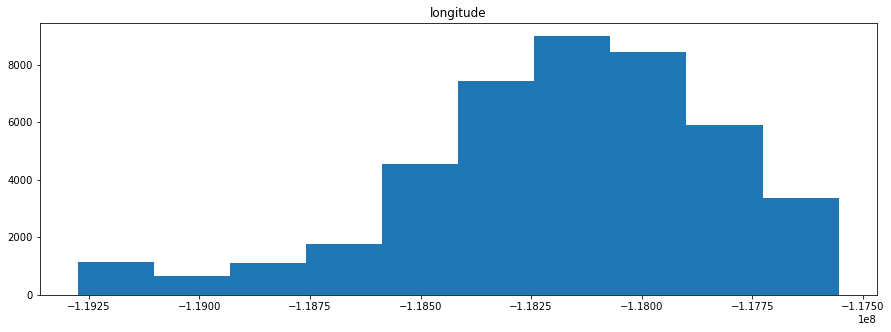

In [60]:

for col in df.columns:
    plt.figure(figsize=(15,5))
    plt.hist(df[col])
    plt.title(col)


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43299 entries, 0 to 52440
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   area        43299 non-null  int64
 1   year_built  43299 non-null  int64
 2   bedrooms    43299 non-null  int64
 3   bathrooms   43299 non-null  int64
 4   tax_value   43299 non-null  int64
 5   tax_amount  43299 non-null  int64
 6   fips        43299 non-null  int64
 7   zipcode     43299 non-null  int64
 8   pools       43299 non-null  int64
 9   lot_size    43299 non-null  int64
 10  latitude    43299 non-null  int64
 11  longitude   43299 non-null  int64
dtypes: int64(12)
memory usage: 5.3 MB


In [62]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,area,year_built,bedrooms,bathrooms,tax_value,tax_amount,fips,zipcode,pools,lot_size,latitude,longitude
count,43299,43299,43299,43299,43299,43299,43299,43299,43299,43299,43299,43299
mean,1702.08,1962.16,3.21384,2.04732,381220,4723.93,6049.01,96576.8,0.167741,6757.99,3.40148e+07,-1.1818e+08
std,637.858,22.1107,0.795605,0.734676,258206,2949.09,20.6196,1515.67,0.37364,2287.98,271680,347366
min,152,1895,2,1,3254,49,6037,95982,0,236,3.33406e+07,-1.19275e+08
25%,1235,1950,3,2,177184,2482.5,6037,96210,0,5408,3.38233e+07,-1.18376e+08
50%,1560,1959,3,2,339849,4266,6037,96420,0,6544,3.39959e+07,-1.18135e+08
75%,2043,1977,4,2,528000,6341.5,6059,96996,0,7811,3.41844e+07,-1.1793e+08
max,4375,2016,5,4,1.36813e+06,14740,6111,399675,1,14100,3.47184e+07,-1.17555e+08


In [63]:
# perform value counts for each column
for col in df.columns:
    print(f'----------------{col}--------------------')
    print(df[col].value_counts())

----------------area--------------------
1120    131
1200    112
1080     96
936      82
1232     81
       ... 
3898      1
3770      1
610       1
3706      1
4267      1
Name: area, Length: 3184, dtype: int64
----------------year_built--------------------
1955    1759
1950    1461
1954    1392
1953    1328
1956    1217
        ... 
1900       7
1896       5
1898       4
1897       1
2016       1
Name: year_built, Length: 121, dtype: int64
----------------bedrooms--------------------
3    20911
4    12324
2     7731
5     2333
Name: bedrooms, dtype: int64
----------------bathrooms--------------------
2    23642
1     9439
3     8948
4     1270
Name: bathrooms, dtype: int64
----------------tax_value--------------------
455000    34
600000    28
500000    24
550000    23
530000    22
          ..
122000     1
212108     1
445216     1
330890     1
133119     1
Name: tax_value, Length: 31821, dtype: int64
----------------tax_amount--------------------
3287     20
1170     19
1096     17

## Data Context
- 43.8K records
- lowest tax_value is 3.3K
- highest tax_value is 1.37M
- mean tax_value is about 343.2K
- most tax_value below 400K
- 
- bedroom counts: 2,3,4,5 (most have 3)
- bathroom counts: 1,2,3,4 (most have 2)
- most lot_size between 5K-7K sqft
- most house area between 1K and 1.75K sqft
- fips (county): 6037 (Los Angeles County),6059 (Orange County) , 6111 (Ventura County)
- most houses in fips6037
- most houses between latitude 33600000 and 34300000
- most houses between longitude -118600000 and -117600000

## Split Data

In [64]:
 # train/validate/test split
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [65]:
df.shape, train.shape, validate.shape, test.shape

((43299, 12), (24247, 12), (10392, 12), (8660, 12))

# <font color ='red'> Exploration and Pre-Processing

## Explore Train Data

### What are the questions:
- What are the transactions are in 2017?
    - Started with 52.5K houses, removed 5K for outliers/nulls, 47.5K houses remaining
- What states and counties are the properties located in?
    - California,. Counties: Los Angeles, Ventura, Orange
- What is the tax rate per county? (might have to combine columns to calcualate)
    - Los Angele County Tax Rate: 1.42%
    - Orange County Tax Rate: 1.21%
    - Vetura County Tax Rate: 1.18%
- What is the distribution of tax_value for each county?
    - LA County has the most houses with most of those peaking between 100-300K
    - Ventura and Orange County have less houses and peak between 300-500K
- What are the drivers of single family property values?
    - Drivers indicated: Area, Bathrooms, Bedrooms
- Why do some properties have a much higher value than others when they are located so close to each other?
    - ???
- Why are some properties valued so differently from others when they have nearly the same physical attributes but only differ in location? 
    - ???
- Is having 1 bathroom worse than having 2 bedrooms?
    - Bathroom seems to be more important than bedrooms

### What is the tax rate per county?

In [66]:
((train[train.fips==6037].tax_amount) / (train[train.fips==6037].tax_value)).mean()

0.014326968322925817

In [67]:
((train[train.fips==6059].tax_amount) / (train[train.fips==6059].tax_value)).mean()

0.0121478104919968

In [68]:
((train[train.fips==6111].tax_amount) / (train[train.fips==6111].tax_value)).mean()

0.011836940998160569

## Multivariate Analysis

### What are house values with pools

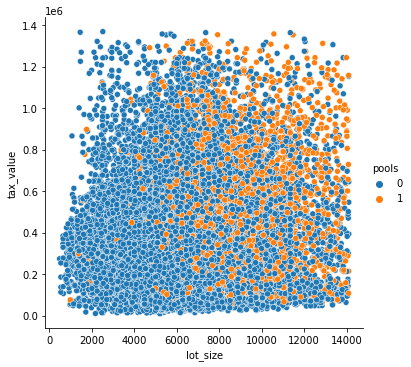

In [69]:
sns.relplot(data=train, x='lot_size', y='tax_value', hue='pools')

### Note: 
- Pools increase with lot_size

### Show value by area with pools

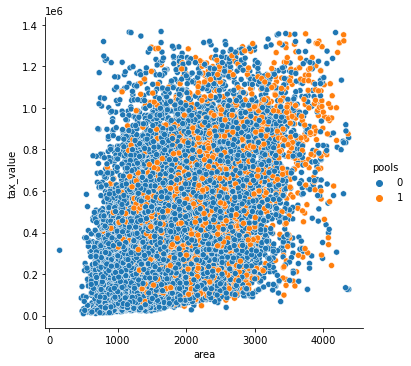

In [70]:
sns.relplot(data=train, x='area', y='tax_value', hue='pools')

### Slight correlationo with pools and house value

### Show house values by coorinates

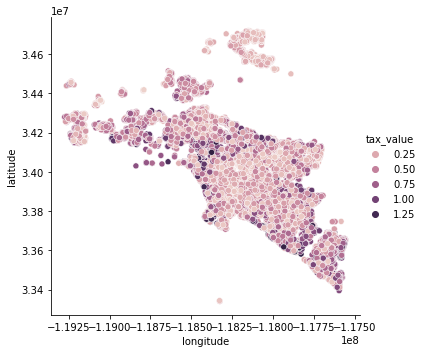

In [71]:
sns.relplot(data=train, x='longitude', y='latitude', hue='tax_value')
plt.show()

In [72]:
train.tax_value.describe()

count    2.424700e+04
mean     3.795340e+05
std      2.583879e+05
min      9.242000e+03
25%      1.755785e+05
50%      3.380740e+05
75%      5.230540e+05
max      1.368130e+06
Name: tax_value, dtype: float64

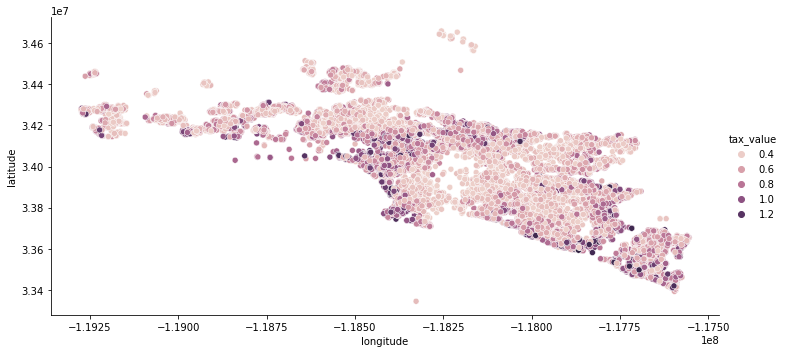

In [73]:
# Show house vlaues create than mean by coorindates, shows a map
value_map = df[df.tax_value > df.tax_value.mean()]
sns.relplot(data=value_map, x='longitude', y='latitude', hue='tax_value', height=5, aspect=2)
plt.show()

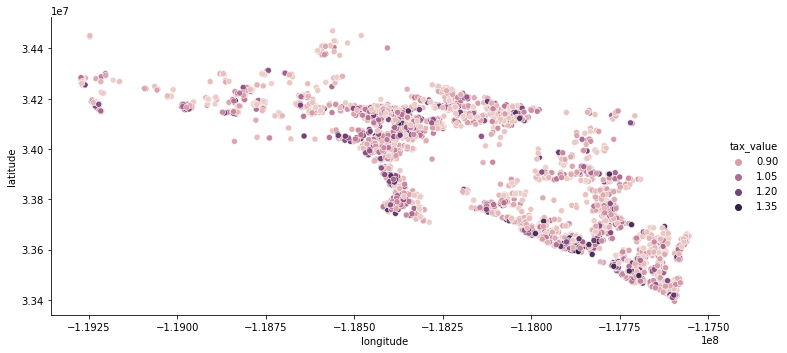

In [74]:
# Show relplot of long/lat coords to show map of homes valued at twice the mean
value_map = df[df.tax_value > (df.tax_value.mean() * 2)]
sns.relplot(data=value_map, x='longitude', y='latitude', hue='tax_value', height=5, aspect=2)
plt.show()

### Notes:
- Highest values alongm the coast and 

### What is the distribution of tax_value across counties
### Show Average Tax Amounts across Counties

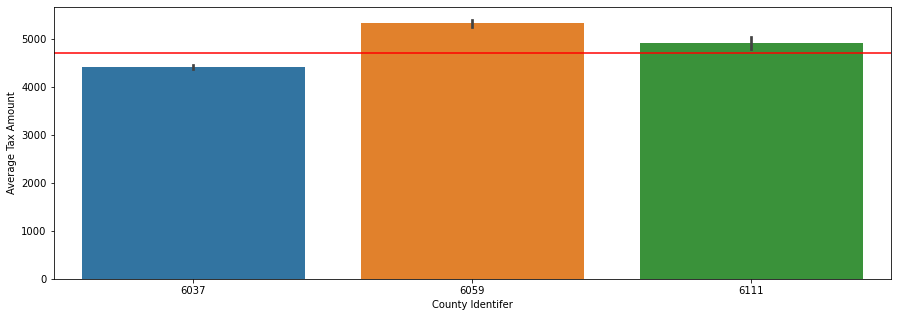

In [75]:
# Show Average House Tax Amounts Aross Counties
plt.figure(figsize=(15,5))
sns.barplot(x=train.fips, y=train.tax_amount)
plt.axhline(y=train.tax_amount.mean(), color='r')
plt.xlabel('County Identifer')
plt.ylabel('Average Tax Amount')
plt.show()

### Notes:
- Tax Amounts across counties don't have significant difference
### Shows Average Tax Value Across Counties

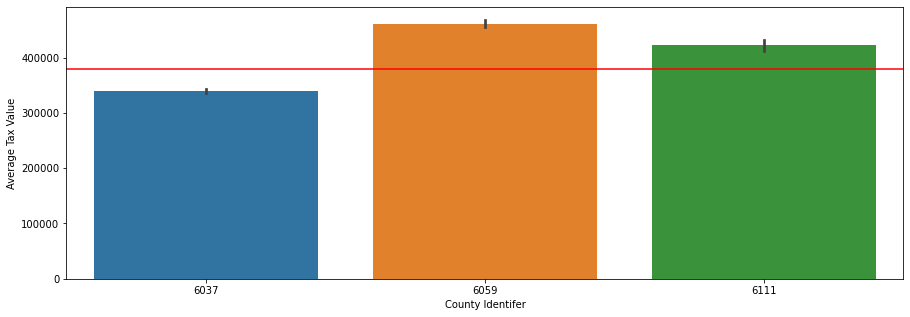

In [76]:
# Show Average Tax Value across counties
plt.figure(figsize=(15,5))
sns.barplot(x=train.fips, y=train.tax_value)
plt.axhline(y=train.tax_value.mean(), color='red')
plt.xlabel('County Identifer')
plt.ylabel('Average Tax Value')
plt.show()

### Notes:
- No significant differnce of tax values between counties however 6037 does drop

### T-Test: Is avg tax_value in fips 6059 > avg tax_value in fips 6111
- H0: fips 6059 avg tax value <= fips 6111 avg tax_value
- H1: fips 6059 avg tax value > fips 6111 avg tax_value

In [77]:
fips_6059 = train[train.fips==6059].tax_value
fips_6111 = train[train.fips==6111].tax_value

In [78]:
alpha = .05
t,p = stats.ttest_ind(fips_6059, fips_6111)
t, p, alpha

(5.65271952659011, 1.62956787405663e-08, 0.05)

### Notes:
- p < alpha, reject H0, fips 6059 is signficant increase

### T-Test: Is avg tax_value in fips 6059 > avg tax-value of all fips
- H0: fips 6059 avg tax value <= avg tax_value of all fips
- H1: fips 6059 avg tax value > avg tax_value of all fips

In [79]:
fips_6059 = train[train.fips==6059].tax_value
fips_mean = train.tax_value.mean()

In [80]:
alpha = .05
t,p = stats.ttest_1samp(fips_6059, fips_mean)
t, p, alpha

(24.26177079971168, 9.509852517054342e-125, 0.05)

### Notes:
- p > alpha, reject H0, fips 6059 is greater than avg of tax_values across fips

### What is the distribution of Value for each Countya

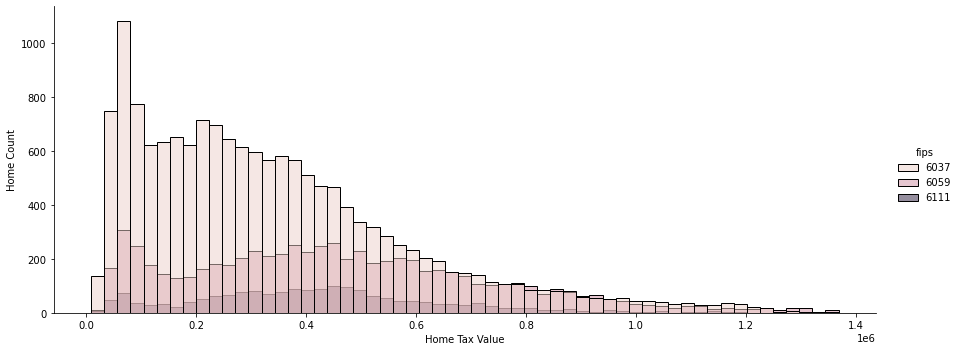

In [81]:
# Show distribution of House Values for each county
sns.displot(x=train.tax_value, hue=train.fips, height=5, aspect=2.5)
plt.xlabel('Home Tax Value')
plt.ylabel('Home Count')
plt.show()

### Note:
- In County 6037, More houses are around 100-300K
- In other counties, most house around 400K

### What is the tax amount distribution across counties?

### Note:
- county 6037, most around 3K
- other counties, most around 4-5K

### Use Pair Plot to find correlation

In [82]:
#sns.pairplot(train)

### Notes:
- Nothing siginficant to show
### Show Heatmap to find correlation between columns

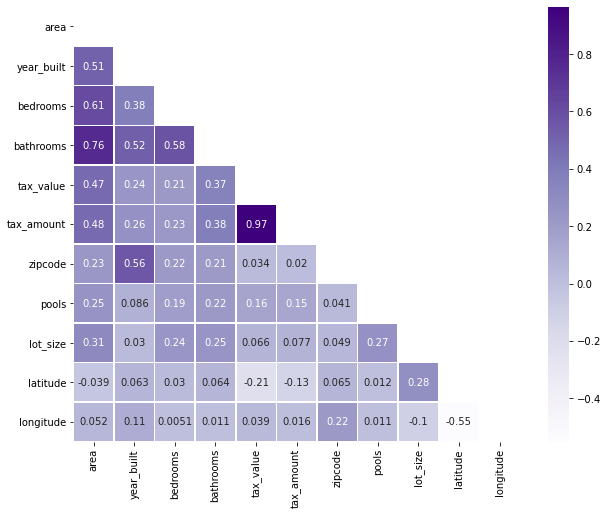

In [83]:
corr_table = train.drop(columns=['fips']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_table, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(corr_table))
plt.show()

### Notes:
- tax_value:area = .50
- tax_value:bathrooms = .39
- tax_value:year_built = .25
- tax_value:bedrooms = .22
- area:bathrooms = .77
- area:bedrooms = .61
- area:year_built = .49
- bathroom:bedrooms = .58
- bathroom:year_built = .51
### Largest Correlations to Value is Area. Area to Bathrooms and Bedrooms.

### Show correlation between year_built and area with tax_value

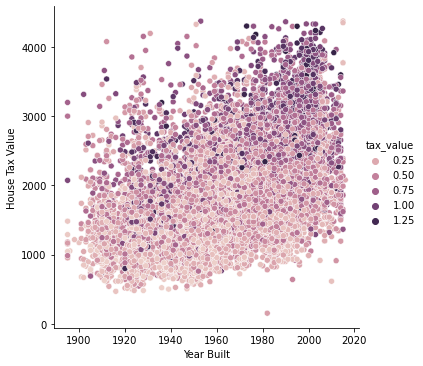

In [84]:
# Shows that value increases with area & year_built
sns.relplot(x='year_built', y='area', data=train,  hue='tax_value', kind='scatter')
plt.xlabel('Year Built')
plt.ylabel('House Tax Value')
plt.show()

### Notes:
- Show tax_value increases with area increase but year_built has little impact

### Show correlation between tax_value and area with bathrooms

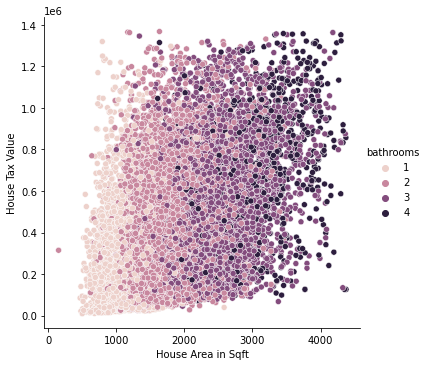

In [85]:
#shows that increasd area tends to have increases bathrooms. Slight correlation to increased value.
sns.relplot(x='area', y='tax_value', data=train, hue='bathrooms', kind='scatter')
plt.xlabel('House Area in Sqft')
plt.ylabel('House Tax Value')
plt.show()

### Notes:
- Shows that increased area has correlatioin with increased  bathroms but little impact to price

### Show correlation between area and tax_value with bedrooms

Text(12.198611111111106, 0.5, 'House Tax Value')

<Figure size 720x720 with 0 Axes>

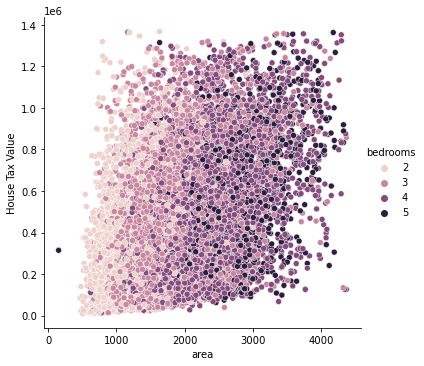

In [86]:
# Shows that bedrooms does not associate to value. Mostly to area.
plt.figure(figsize=(10,10))
sns.relplot(x='area', y='tax_value', data=train, hue='bedrooms', kind='scatter')
plt.ylabel('House Tax Value')

### Notes:
- Show that bedrooms have slight correlatoin to area but not as much as bathroom. And little impact to value

### Show correlation between year_built and tax_value with bathrooms

Text(12.56243055555555, 0.5, 'House Tax Value')

<Figure size 720x720 with 0 Axes>

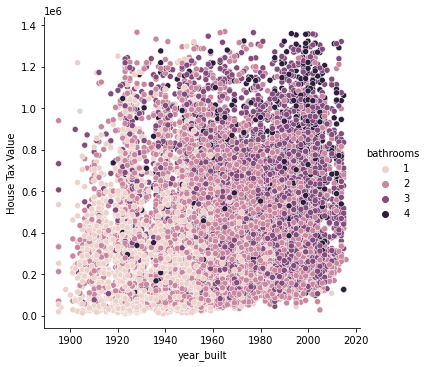

In [87]:
plt.figure(figsize=(10,10))
sns.relplot(x='year_built', y='tax_value', data=train, hue='bathrooms', kind='scatter')
plt.ylabel('House Tax Value')

### Notes:
- Show later years have more bathrooms which also have higher tax_value

### Show correlation between year_built and tax_value with bedrooms

<Figure size 720x1440 with 0 Axes>

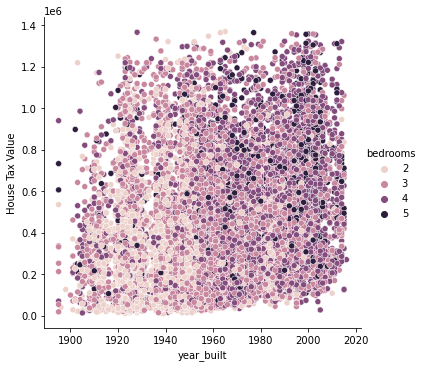

In [88]:
# Shows that later years have more bedrooms but seem to impact value
plt.figure(figsize=(10,20))
sns.relplot(x='year_built', y='tax_value', data=train, hue='bedrooms', kind='scatter')
plt.ylabel('House Tax Value')
plt.show()

### Notes:
- Slight correlation with inceasd bedrooms and new homes which increases value. Most likely because increased bedrooms means increased area.

### Show correlation between year_built and value with area

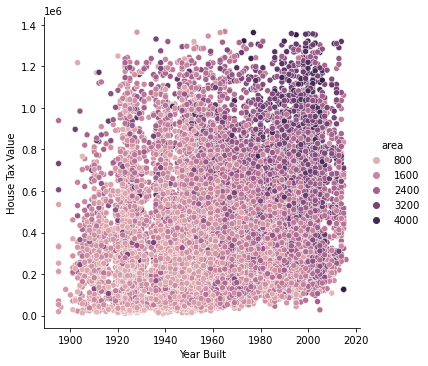

In [89]:
# Shows increased area has  year increased and more high areas have high value
sns.relplot(x='year_built', y='tax_value', data=train, hue='area', kind='scatter')
plt.xlabel('Year Built')
plt.ylabel('House Tax Value')
plt.show()

### Notes:
- Shows increased area are newer homes and have high value

### Show correlation between year_built and value with fips

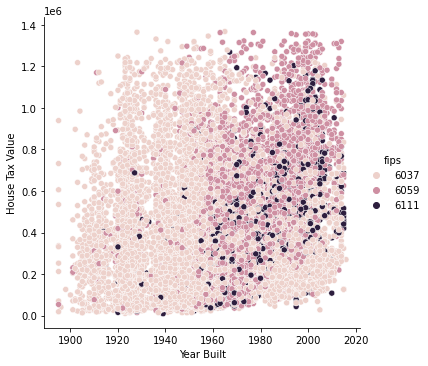

In [90]:
# shows that 6037 has majority of properties, 6059 has more high value properties
sns.relplot(x='year_built', y='tax_value', data=train, hue='fips', kind='scatter')
plt.ylabel('House Tax Value')
plt.xlabel('Year Built')
plt.show()

### Notes:
- shows that 6037 has majority of properties
- show that 6059 abd 6111 has newer homes

### Show correlation between area and value with fips

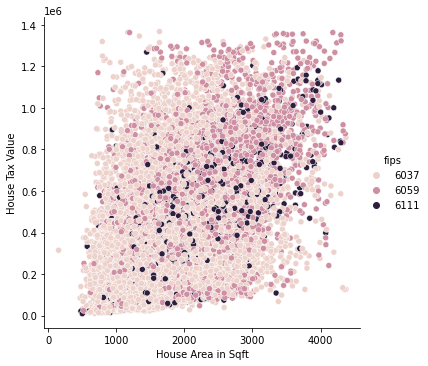

In [91]:
# compare area vs value by fips
sns.relplot(x='area', y='tax_value', data=train, hue='fips', kind='scatter')
plt.ylabel('House Tax Value')
plt.xlabel('House Area in Sqft')
plt.show()

### Notes:
- Shows area and value correlate across fips

### Plot Value to Lot Size by FIPS

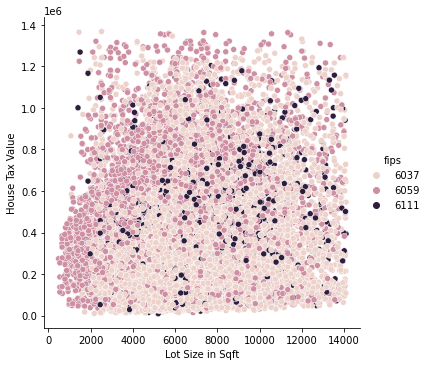

In [92]:
# compare lot size vs value by fips
sns.relplot(x='lot_size', y='tax_value', data=train, hue='fips', kind='scatter')
plt.ylabel('House Tax Value')
plt.xlabel('Lot Size in Sqft')
plt.show()

### Notes:
- 6059 has more smaller lots. Nothing significant toward value

### Show Bar Plot for value vs area by fips (Stopped Loading)

In [93]:
# Bar plot ford value vs area categoriezed by fips.
# sns.barplot(data=train, y='tax_value', x='area')
# plt.ylabel('House Tax Value')
# plt.show()

### Note:
- Show nothing new. value increases with area.

### Show Strip Plot

In [94]:
# sns.stripplot(x='bedrooms', y='tax_value', data=atrain)

### Note:
- Stip Plot shows nothging readable

## Summarize Exploration
- We have 47,500 houses across three California counites of (Los Angeles, Ventura, and Orange)
- Best Three drivers are Area, Bathrooms, and Bedrooms in that order
- Los Angels County has a .2% higher tax rate than the other counties. It also had significantly more houses with a value distribution that peaks between 100-300K.
- Ventura and Orange Counties have a lower tax rate and with significantly less houses that have a value distribution that peak between 300-500K.
- More high value hosues are along the coast and in Orange County

## Pre-Processing (Prep Data for Modeling)

### Drop Unusable and Unneeded Columns for Modeling

In [95]:
# Drop columns not needed
train = train.drop(columns=['tax_amount'])
validate = validate.drop(columns=['tax_amount'])
test = test.drop(columns=['tax_amount'])
train.head()

,area,year_built,bedrooms,bathrooms,tax_value,fips,zipcode,pools,lot_size,latitude,longitude
2617,1558,1923,3,1,691642,6037,96027,1,6484,34089256,-118365318
47307,1398,1980,2,2,518000,6059,96954,0,2300,33717859,-117766805
16553,1418,1923,3,2,379700,6037,96507,0,7454,34069398,-117746731
31972,2298,1977,4,2,325368,6111,97091,0,6715,34220094,-119000009
7551,1780,1976,4,2,500406,6037,96356,0,7501,34292776,-118543290


### Note:
- Dropped tax_amount since it wil be data leakage during modeling

# <font color = 'red'>Experiment with Models

In [96]:
# Filter sets by fips
train = train[train.fips==6111]
validate = train[train.fips==6111]
test = train[train.fips==6111]

## Results:
- ???

### Create y_train and X_train sets

In [97]:
# establish target column
target = 'tax_value'

# create X & y version of train, validate, test with y the target and X are the features. 
X_train = train.drop(columns=[target])
y_train = train[target]

X_validate = validate.drop(columns=[target])
y_validate = validate[target]

X_test = test.drop(columns=[target])
y_test = test[target]

In [98]:
X_train.shape, X_validate.shape, X_test.shape, y_train.shape, y_validate.shape, y_test.shape

((1871, 10), (1871, 10), (1871, 10), (1871,), (1871,), (1871,))

### Scale

In [99]:
# Create the scale container
scaler = sklearn.preprocessing.MinMaxScaler()


# Fit the scaler to the features
scaler.fit(X_train)

# create scaled X versions 
X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

# Convert numpy array to pandas dataframe for feature Engineering
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns.to_list())
X_validate_scaled = pd.DataFrame(X_validate_scaled, index=X_validate.index, columns=X_validate.columns.to_list())
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns.to_list())

In [100]:
X_train_scaled.head()

,area,year_built,bedrooms,bathrooms,fips,zipcode,pools,lot_size,latitude,longitude
31972,0.475916,0.638095,0.666667,0.333333,0.0,0.963542,0.0,0.418570,0.250136,0.427576
42385,0.427225,0.714286,0.333333,0.333333,0.0,0.971354,0.0,0.347456,0.401063,0.604168
3918,0.260471,0.733333,0.333333,0.333333,0.0,0.973958,0.0,0.462041,0.972131,0.056460
10032,0.199215,0.504762,0.333333,0.333333,0.0,0.000000,0.0,0.520318,0.153007,0.513455
1359,0.324869,0.828571,0.666667,0.333333,0.0,0.954427,0.0,0.287053,0.425725,0.193244


### Feature Engineering

### Use Select K Best to find 3 Best Features


In [101]:
from sklearn.feature_selection import SelectKBest, f_regression

# Use f_regression stats test each column to find best 3 features
f_selector = SelectKBest(f_regression, k=3)

# find tthe best correlations with y
f_selector.fit(X_train_scaled, y_train)

# Creaet boolean mask of the selected columns. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

f_feature

['area', 'year_built', 'bathrooms']

### Note:
- Select K Best selected area, year_built, and bathrooms.

### Use Recursive Feature Elemination to select 3 best features

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# create the ML algorithm container
lm = LinearRegression()

# create the rfe container with the the number of features I want. 
rfe = RFE(lm, n_features_to_select=3)

# fit RFE to the data
rfe.fit(X_train_scaled,y_train)  

# get the mask of the selected columns
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

rfe_feature

['area', 'year_built', 'zipcode']

### Notes:
- RFE Select 3 Best Columns: area, latitude, longitude



In [103]:
X_train_scaled.head()

,area,year_built,bedrooms,bathrooms,fips,zipcode,pools,lot_size,latitude,longitude
31972,0.475916,0.638095,0.666667,0.333333,0.0,0.963542,0.0,0.418570,0.250136,0.427576
42385,0.427225,0.714286,0.333333,0.333333,0.0,0.971354,0.0,0.347456,0.401063,0.604168
3918,0.260471,0.733333,0.333333,0.333333,0.0,0.973958,0.0,0.462041,0.972131,0.056460
10032,0.199215,0.504762,0.333333,0.333333,0.0,0.000000,0.0,0.520318,0.153007,0.513455
1359,0.324869,0.828571,0.666667,0.333333,0.0,0.954427,0.0,0.287053,0.425725,0.193244


In [104]:
# Remove Features before Modeling
# X_train_scaled = X_train_scaled.drop(columns=['pools','lot_size','bedrooms','bathrooms'])
# X_validate_scaled = X_validate_scaled.drop(columns=['pools','lot_size','bedrooms','bathrooms'])
# X_test_scaled = X_test_scaled.drop(columns=['pools','lot_size','bedrooms','bathrooms'])

# <font color = 'red'>Modeling

## Create Baseline & Evaluate with RMSE

In [105]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)
y_train.head()

,tax_value
31972,325368
42385,612000
3918,297083
10032,57881
1359,266714


In [106]:
# Add target mean column as baseline check
y_train['mean_pred'] = y_train.tax_value.mean()
y_validate['mean_pred'] = y_validate.tax_value.mean()

# add target median column as baseline check
y_train['median_pred'] = y_train.tax_value.median()
y_validate['median_pred'] = y_validate.tax_value.median()

In [107]:
# Create Baseline RMSE of target mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.mean_pred) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.mean_pred) ** .5

In [108]:
# Show RMSE Score for train and validate
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  224136.87 
Validate/Out-of-Sample:  224136.87


In [109]:
# Create Baseline RMSE of target median
rmse_train = mean_squared_error(y_train.tax_value, y_train.median_pred) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.median_pred) ** .5

In [110]:
# Show RMSE Score for train and validate
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  224450.83 
Validate/Out-of-Sample:  224450.83


### Notes:
- Mean Baseline RMSE (258K) is better than Median Baseline RMSE (261K)

### Create Metric Holder

In [111]:
metric_df = pd.DataFrame(data=[
            {
                'model': 'mean_baseline', 
                'RMSE_train': rmse_train,
                'RMSE_validate': rmse_validate
                }
            ])

In [112]:
metric_df

,model,RMSE_train,RMSE_validate
0,mean_baseline,224450.829181,224450.829181


## Develop Models 

### Create Model 1 - Linear Regression (OLS) 

In [113]:
# create, fit, predict ols model
ols = LinearRegression()
ols.fit(X_train_scaled, y_train.tax_value)
y_train['ols_pred'] = ols.predict(X_train_scaled)

In [114]:
ols.coef_

array([ 6.26561725e+05,  2.43891760e+05, -9.56417597e+04,  6.93167836e+04,
        2.91038305e-11, -8.14302872e+04,  5.30732076e+04, -1.03327107e+04,
       -1.12147867e+04,  1.12462199e+04])

In [115]:
# create rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.ols_pred) ** .5

# predict validate
y_validate['ols_pred'] = ols.predict(X_validate_scaled)

# evaluate rmse of train and validate
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.ols_pred) ** .5

In [116]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  165001.08734622615 
Validation/Out-of-Sample:  165001.08734622615


In [117]:
# add to eval to metric holder
metric_df = metric_df.append({
    'model': 'ols_egressor', 
    'RMSE_train': rmse_train,
    'RMSE_validate': rmse_validate,
    }, ignore_index=True)

In [118]:
metric_df

,model,RMSE_train,RMSE_validate
0,mean_baseline,224450.829181,224450.829181
1,ols_egressor,165001.087346,165001.087346


### Notes:
- RMSE of OLS is better than baseline by 44K

### Create Model 2: Lassolars with Alpha = .01

In [119]:
# create object of model
lars = LassoLars(alpha=0.01)

# fit object to train data. Specify y_train column since it converted to a dataframe
lars.fit(X_train_scaled, y_train.tax_value)

# predict on train
y_train['lars_pred'] = lars.predict(X_train_scaled)

# create rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.lars_pred) ** .5

# predict validate
y_validate['lars_pred'] = lars.predict(X_validate_scaled)

# create rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.lars_pred) ** .5

In [120]:
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate,
     "\nDifference: ", rmse_validate - rmse_train)

RMSE for Lasso + Lars
Training/In-Sample:  165001.08735208103 
Validation/Out-of-Sample:  165001.08735208103 
Difference:  0.0


In [121]:
lars.coef_

array([626557.07293395, 243892.86507501, -95637.18698561,  69314.73671031,
            0.        , -81429.51835651,  53071.97455879, -10328.14597969,
       -11213.72777394,  11244.4807779 ])

In [122]:
metric_df = metric_df.append({
    'model': 'lasso_alpha_.01', 
    'RMSE_train': rmse_train,
    'RMSE_validate': rmse_validate,
    }, ignore_index=True)

In [123]:
metric_df

,model,RMSE_train,RMSE_validate
0,mean_baseline,224450.829181,224450.829181
1,ols_egressor,165001.087346,165001.087346
2,lasso_alpha_.01,165001.087352,165001.087352


### Notes:
- Lassolars RMSE is the same as OLS

### Create Model 3: TweedieRegressor (GLM) General Linear Model with Power  = 1 (Poisson) and Alpha=.01

In [124]:
# create the model object
glm = TweedieRegressor(power=1, alpha=.01)


# fit the model train data. Specify y_train columns since it was converted to dataframe 
glm.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['glm_pred'] = glm.predict(X_train_scaled)

# create rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.glm_pred) ** .5

# predict validate
y_validate['glm_pred'] = glm.predict(X_validate_scaled)

# evaluate train and validate rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.glm_pred) ** .5

print("RMSE for GLM using Tweedie, power=1 & alpha=.01\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=.01
Training/In-Sample:  162236.2918946144 
Validation/Out-of-Sample:  162236.2918946144


In [125]:
# added to metric holder
metric_df = metric_df.append({
    'model': 'glm_poisson_.01', 
    'RMSE_train': rmse_train,
    'RMSE_validate': rmse_validate,
    }, ignore_index=True)

In [126]:
metric_df

,model,RMSE_train,RMSE_validate
0,mean_baseline,224450.829181,224450.829181
1,ols_egressor,165001.087346,165001.087346
2,lasso_alpha_.01,165001.087352,165001.087352
3,glm_poisson_.01,162236.291895,162236.291895


### Notes:
- glm rmse is the same as ols and lassolars

### Create Model 4 - Polynomial Regression

In [127]:
# create polynomial features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled to new sets
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 =  pf.transform(X_test_scaled)

In [128]:
# create the model object
lm2 = LinearRegression()

# fit the model train data. Specify y_train columns since it was converted to dataframe  
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['lm2_pred'] = lm2.predict(X_train_degree2)

# create rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.lm2_pred) ** .5

# predict validate
y_validate['lm2_pred'] = lm2.predict(X_validate_degree2)

# evaluate rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.lm2_pred) ** .5

In [129]:
print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  153872.0876126607 
Validation/Out-of-Sample:  153872.0876126607


In [130]:
# add to metric holder
metric_df = metric_df.append({
    'model': 'PolynomialRegressor', 
    'RMSE_train': rmse_train,
    'RMSE_validate': rmse_validate,
    }, ignore_index=True)

In [131]:
metric_df

,model,RMSE_train,RMSE_validate
0,mean_baseline,224450.829181,224450.829181
1,ols_egressor,165001.087346,165001.087346
2,lasso_alpha_.01,165001.087352,165001.087352
3,glm_poisson_.01,162236.291895,162236.291895
4,PolynomialRegressor,153872.087613,153872.087613


### Notes:
- Polynomial Regression RMSE is better than ols and lassolars by 8K

### Create Model 5 - New LassoLars with Alpha .0001
- I changed alpha to .01 and RMSE didn't change

In [132]:
# create object of model
lars = LassoLars(alpha=0.0001)

# fit object to train data. Specify y_train column since it converted to a dataframe
lars.fit(X_train_scaled, y_train.tax_value)

# predict on train
y_train['lars_pred_.0001'] = lars.predict(X_train_scaled)

# create rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train['lars_pred_.0001']) ** .5

# predict validate
y_validate['lars_pred_.0001'] = lars.predict(X_validate_scaled)

# create rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate['lars_pred_.0001']) ** .5

print("RMSE for Lasso + Lars, alpha=.0001\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate,
     "\nDifference: ", rmse_validate - rmse_train)

# add to metric holder
metric_df = metric_df.append({
    'model': 'LassoLars_.0001', 
    'RMSE_train': rmse_train,
    'RMSE_validate': rmse_validate,
    }, ignore_index=True)

RMSE for Lasso + Lars, alpha=.0001
Training/In-Sample:  165001.08734622673 
Validation/Out-of-Sample:  165001.08734622673 
Difference:  0.0


In [133]:
metric_df

,model,RMSE_train,RMSE_validate
0,mean_baseline,224450.829181,224450.829181
1,ols_egressor,165001.087346,165001.087346
2,lasso_alpha_.01,165001.087352,165001.087352
3,glm_poisson_.01,162236.291895,162236.291895
4,PolynomialRegressor,153872.087613,153872.087613
5,LassoLars_.0001,165001.087346,165001.087346


# Notes:
- Still Around 230K

### Create Model 6 - TweedieRegressor with Alpha = .0001 and Power = 1 (Poisson)

In [134]:
# create the model object
glm = TweedieRegressor(power=1, alpha=.0001)


# fit the model train data. Specify y_train columns since it was converted to dataframe 
glm.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['glm_pred_.0001'] = glm.predict(X_train_scaled)

# create rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train['glm_pred_.0001']) ** .5

# predict validate
y_validate['glm_pred_.0001'] = glm.predict(X_validate_scaled)

# evaluate train and validate rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate['glm_pred_.0001']) ** .5

print("RMSE for GLM using Tweedie, power=1 & alpha=.0001\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

# add to metric holder
metric_df = metric_df.append({
    'model': 'glm_poisson_.0001', 
    'RMSE_train': rmse_train,
    'RMSE_validate': rmse_validate,
    }, ignore_index=True)

RMSE for GLM using Tweedie, power=1 & alpha=.0001
Training/In-Sample:  162236.2908657914 
Validation/Out-of-Sample:  162236.2908657914


In [135]:
metric_df

,model,RMSE_train,RMSE_validate
0,mean_baseline,224450.829181,224450.829181
1,ols_egressor,165001.087346,165001.087346
2,lasso_alpha_.01,165001.087352,165001.087352
3,glm_poisson_.01,162236.291895,162236.291895
4,PolynomialRegressor,153872.087613,153872.087613
5,LassoLars_.0001,165001.087346,165001.087346
6,glm_poisson_.0001,162236.290866,162236.290866


### Notes:
- Polynomial Regression performs the best at 209K, around 8K better
- I experimented with reducing features: removed fips, then removed year_built with only change to Polynomial Regressor bringing it closer to others.Finally added features: lot_size, lat/long, pools.
- GLM scored the worst at 266K, cose to baseline 270K, DO NOT USE (first iteration)
- (2nd Run) All except PolyReg was the same scored at 217K
- OLS and LassoLars scored around 230K (first run)

## <font color = 'red' > Evaluate
    
### Plotting Actual vs Predicted Values

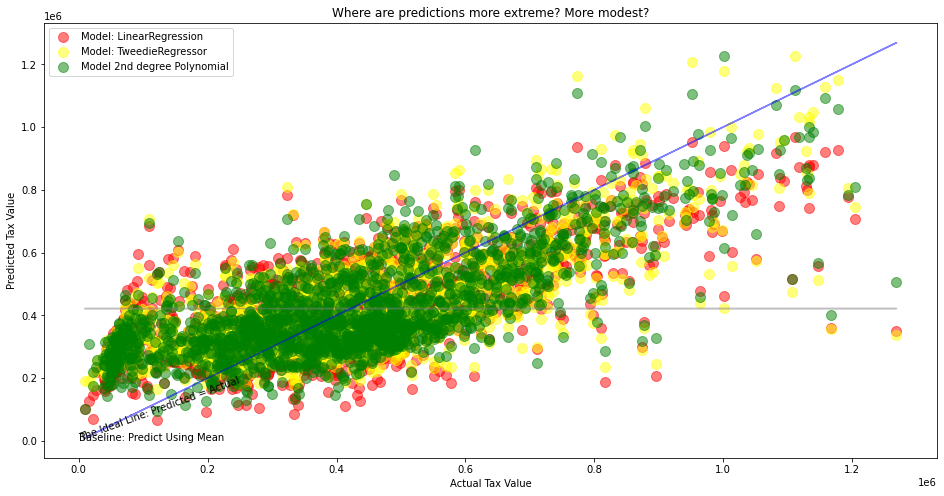

In [136]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.mean_pred, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=20)

plt.scatter(y_validate.tax_value, y_validate.ols_pred, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.glm_pred, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.lm2_pred, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

### Notes:
- ????

### Residual Plots: Plotting the Errors in Predictions

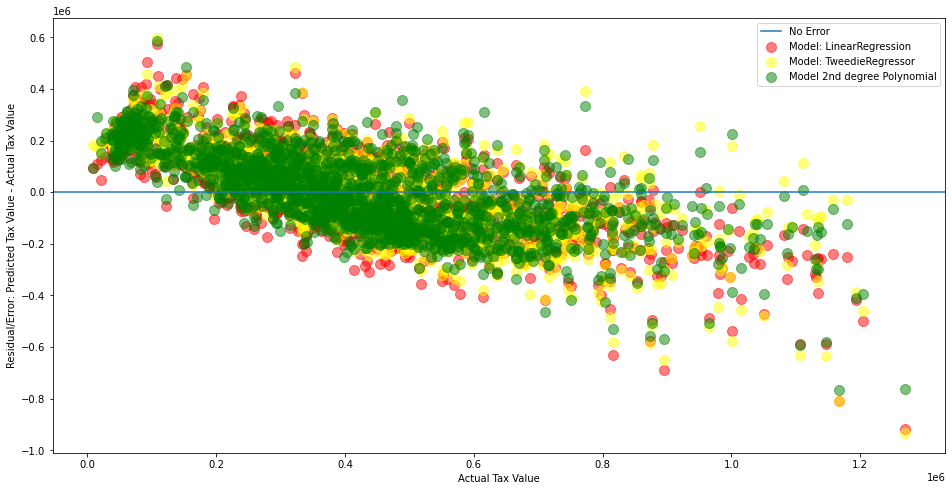

In [137]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.tax_value, y_validate.ols_pred - y_validate.tax_value , 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.glm_pred - y_validate.tax_value, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.lm2_pred - y_validate.tax_value, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Residual/Error: Predicted Tax Value - Actual Tax Value")
# plt.title("Do the size of errors change as the actual value changes?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

### Notes:
- ???

### Histograms of Actuals vs Predicted Values

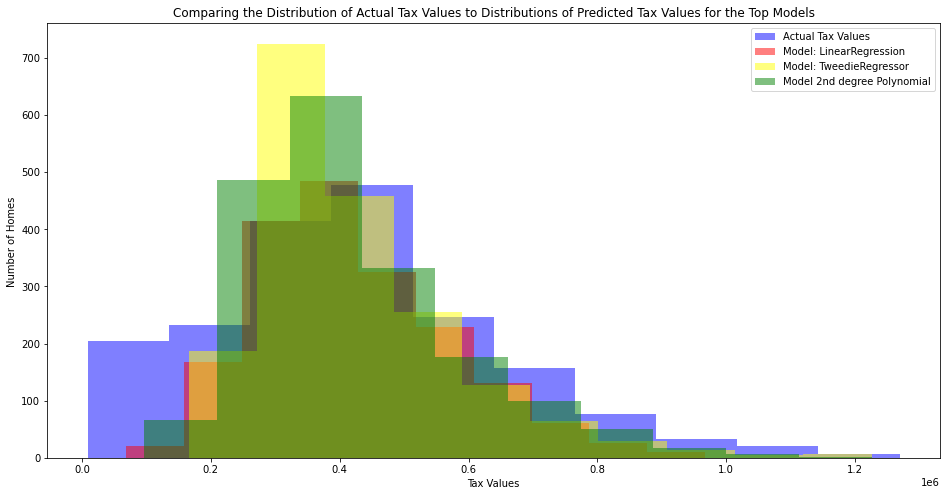

In [138]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.tax_value, color='blue', alpha=.5, label="Actual Tax Values")
plt.hist(y_validate.ols_pred, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.glm_pred, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.lm2_pred, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Tax Values")
plt.ylabel("Number of Homes ")
plt.title("Comparing the Distribution of Actual Tax Values to Distributions of Predicted Tax Values for the Top Models")
plt.legend()
plt.show()

### Notes:
- Models capture most of actual values distribution but miss the lower valued homes

## Model Selection and Out-of-Sample Evaluatoin

In [139]:
# predict train
y_test['lm2_pred'] = lm2.predict(X_test_degree2)

# create rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.lm2_pred) ** .5

print("RMSE for Polynomial Model, degrees=2\nTest/Out-of-Sample: ", rmse_test)# add to metric holder

RMSE for Polynomial Model, degrees=2
Test/Out-of-Sample:  153872.0876126607


In [140]:
metric_df

,model,RMSE_train,RMSE_validate
0,mean_baseline,224450.829181,224450.829181
1,ols_egressor,165001.087346,165001.087346
2,lasso_alpha_.01,165001.087352,165001.087352
3,glm_poisson_.01,162236.291895,162236.291895
4,PolynomialRegressor,153872.087613,153872.087613
5,LassoLars_.0001,165001.087346,165001.087346
6,glm_poisson_.0001,162236.290866,162236.290866


### Notes:
- Polynomial Model RMSE is 18.6M indicating wrong model to use and/or overfit

### Check with OLS

In [141]:
# predict test
y_test['ols_pred'] = ols.predict(X_test_scaled)

# evaluate rmse of train and validate
rmse_test = mean_squared_error(y_test.tax_value, y_test.ols_pred) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_test)

RMSE for OLS using LinearRegression
Training/In-Sample:  165001.08734622615


### Note:
- OLS performed worse than baseline on test data set

# <font color = 'red'> Conclusion

## Summary
- 

## Recommendations
- ???

## Conclusion
- ???

### Project Description

- A model that predicts property tax assessed values of single family properties based on 2017 transactions.
- Identify ways to make a better model for Zillow.
- Create new features out of existing features.
- Try non-linear regression model or try a model for each count

Deliver:
1. Github Repo
    - README.md
    - Final Report
    - Working Notebooks
    - Acquire and Prepare Modules
    - Misc Artifacts
1. Regression Model (Linear or Non-Linear)
2. Final Notebook with Recommendation
    - 4 Visuals, 2 with stats tests
        - Data Context of Target Variable (Distribution of values)
    - 3 Best Models (show steps/code to fit/eval/select)
    - Visual of how best Model performed
3. Working Notebook:
    - Reproducible comments
    - Exploration with at least two stats test during exploration
5. Presentation
    - Findings
    - Methodologies
    - Conclusions

### Initial Questions

- What are the transactions are in 2017?
- What states and counties are the properties located in?
- What is the tax rate per county or fips? (might have to combine columns to calcualate)
- What is the distribution of tax rates for each county?
- What is the distribution of taxes across fips?
- What are the drivers of single family property values?
- Why do some properties have a much higher value than others when they are located so close to each other?
- Why are some properties valued so differently from others when they have nearly the same physical attributes but only differ in location? 
- Is having 1 bathroom worse than having 2 bedrooms?

## Live Presentation

- intro (live)
- audience & setting  (live)
- content (live)
- Verbal Conclusion (findings, next steps, recommendations)  (live) 
- time (live) 

## Deliver Predictions
- Deliver predictions (.csv) 